<a href="https://colab.research.google.com/github/davidhe2013/ai-science-training-series/blob/main/2022_10_6_David_He_Session_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is my homework. Here is the training results with a new structure:

First conv2 with 16 filters, added 7th cov layer with 256 filters after 6th conv layer with 512 filters 

lr: 0.001;
batch_size: 512;
Epoch:100, Accuarcy: 0.9731;
Epoch:500, Accuarcy: 0.9919.

In [ ]:
%matplotlib inline

import tensorflow as tf

import numpy
import matplotlib.pyplot as plt
import time

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype(numpy.float32)
x_test  = x_test.astype(numpy.float32)

x_train /= 255.
x_test  /= 255.

y_train = y_train.astype(numpy.int32)
y_test  = y_test.astype(numpy.int32)

In [ ]:
class CIFAR10Classifier(tf.keras.models.Model):

    def __init__(self, activation=tf.nn.tanh):
        tf.keras.models.Model.__init__(self)

        self.conv_1 = tf.keras.layers.Conv2D(16, [3, 3], activation='relu')
        self.conv_2 = tf.keras.layers.Conv2D(32, [3, 3], activation='relu')
        self.conv_3 = tf.keras.layers.Conv2D(64, [3, 3], activation='relu')
        self.conv_4 = tf.keras.layers.Conv2D(128, [3, 3], activation='relu')
        self.conv_5 = tf.keras.layers.Conv2D(256, [3, 3], activation='relu')
        self.conv_6 = tf.keras.layers.Conv2D(512, [3, 3], activation='relu')
        self.conv_7 = tf.keras.layers.Conv2D(256, [3, 3], activation='relu')
        self.pool_8 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.drop_9 = tf.keras.layers.Dropout(0.25)
        self.dense_10 = tf.keras.layers.Dense(128, activation='relu')
        self.drop_11 = tf.keras.layers.Dropout(0.5)
        self.dense_12 = tf.keras.layers.Dense(10, activation='softmax')

    def call(self, inputs):

        x = self.conv_1(inputs)
        x = self.conv_2(x)
        x = self.conv_3(x)
        x = self.conv_4(x)
        x = self.conv_5(x)
        x = self.conv_6(x)
        x = self.conv_7(x)
        x = self.pool_8(x)
        x = self.drop_9(x)
        x = tf.keras.layers.Flatten()(x)
        x = self.dense_10(x)
        x = self.drop_11(x)
        x = self.dense_12(x)

        return x

In [ ]:
def train_network_concise(_batch_size, _n_training_epochs, _lr):

    cnn_model = CIFAR10Classifier()

    cnn_model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=['accuracy'])
    
    history = cnn_model.fit(x_train, y_train, batch_size=_batch_size, epochs=_n_training_epochs)
    return history, cnn_model

In [ ]:
# This took 43 seconds per epoch on my laptop
batch_size = 512
epochs = 100
lr = .001
history, cnn_model = train_network_concise(batch_size, epochs, lr)

Epoch 1/100
98/98 [==============================] - 6s 57ms/step - loss: 2.0400 - accuracy: 0.2267
Epoch 2/100
98/98 [==============================] - 6s 57ms/step - loss: 1.6686 - accuracy: 0.3873
Epoch 3/100
98/98 [==============================] - 6s 57ms/step - loss: 1.4841 - accuracy: 0.4619
Epoch 4/100
98/98 [==============================] - 6s 57ms/step - loss: 1.3496 - accuracy: 0.5152
Epoch 5/100
98/98 [==============================] - 6s 58ms/step - loss: 1.2313 - accuracy: 0.5615
Epoch 6/100
98/98 [==============================] - 6s 57ms/step - loss: 1.1335 - accuracy: 0.5955
Epoch 7/100
98/98 [==============================] - 6s 57ms/step - loss: 1.0648 - accuracy: 0.6248
Epoch 8/100
98/98 [==============================] - 6s 57ms/step - loss: 0.9900 - accuracy: 0.6481
Epoch 9/100
98/98 [==============================] - 6s 57ms/step - loss: 0.9340 - accuracy: 0.6722
Epoch 10/100
98/98 [==============================] - 6s 57ms/step - loss: 0.9097 - accuracy: 0.6794

Hyperparameters (optimizer: Adam): original structure                                Accuracy
lr     Epoch    batch_size
0.001  100      512                                                                  0.8916
0.001  200      512                                                                  0.9185
0.001  300      512                                                                  0.9251
0.001  500      512                                                                  0.9508

Hyperparameters (optimizer: RMSProp): original structure                             Accuracy
lr     Epoch    batch_size
0.001  100      512                                                                  0.8840
0.001  200      512                                                                  0.8797
0.001  300      512                                                                  0.8747
0.001  500      512                                                                  0.8812

With Structure Changed (64 filters first layer and 128 filters second layer)
lr     Epoch    batch_size
0.001  100      512                                                                  0.8897
0.001  500      512                                                                  0.9504

With Structure Changed (added 3rd converlution layer with 128 filters)
lr     Epoch    batch_size
0.001  100      512                                                                  0.9267
0.001  500      512                                                                  0.9754

With Structure Changed (first conv2 with 16 filters, added 4th converlution layer with 128 filters)
lr     Epoch    batch_size
0.001  100      512                                                                  0.9332
0.001  500      512                                                                  0.9754

With Structure Changed (first conv2 with 16 filters, added 5th converlution layer with 256 filters)
lr     Epoch    batch_size
0.001  100      512                                                                  0.9563
0.001  500      512                                                                  0.9891

With Structure Changed (first conv2 with 16 filters, added 6th converlution layer with 512 filters)
lr     Epoch    batch_size
0.001  100      512                                                                  0.9575
0.001  500      512                                                                  0.9908

With Structure Changed (first conv2 with 16 filters, added 7th cov layer with 256 filters after 6th conv layer with 512 filters)
lr     Epoch    batch_size
0.001  100      512                                                                  0.9731
0.001  100      512                                                                  0.9919


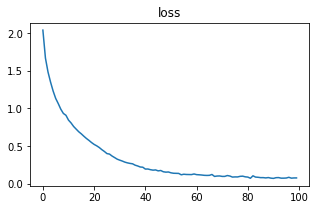

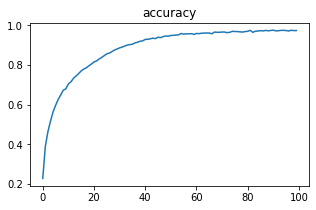

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['accuracy'])
plt.title('accuracy');

In [ ]:
%%time
x_test_reshaped = numpy.expand_dims(x_test, -1)
scores = cnn_model.evaluate(x_test, y_test, verbose=2)
print("%s: %.2f%%" % (cnn_model.metrics_names[1], scores[1]*100))

313/313 - 1s - loss: 1.4965 - accuracy: 0.7618 - 841ms/epoch - 3ms/step
accuracy: 76.18%
CPU times: user 880 ms, sys: 110 ms, total: 990 ms
Wall time: 1.03 s


In [ ]:
from sklearn.metrics import confusion_matrix

print('Confusion matrix (rows: true classes; columns: predicted classes):'); print()
predictions = cnn_model.predict(x_test)
cm=confusion_matrix(y_test, numpy.argmax(predictions, axis=1), labels=list(range(10)))
print(cm); print()

print('Classification accuracy for each class:'); print()
for i,j in enumerate(cm.diagonal()/cm.sum(axis=1)): print("%d: %.4f" % (i,j))

Confusion matrix (rows: true classes; columns: predicted classes):

313/313 [==============================] - 1s 2ms/step
[[823  15  51  15  11   1   6   4  51  23]
 [ 14 925   1   3   0   1   3   0  15  38]
 [ 81   5 666  70  54  23  71  15   9   6]
 [ 33   6  76 623  57  56  91  16  19  23]
 [ 24   1  87  48 734  10  53  37   3   3]
 [ 14   4  66 236  38 565  27  39   4   7]
 [ 10   6  53  45  16   5 853   4   4   4]
 [ 46   1  57  46  59  33   6 738   1  13]
 [ 85  24  11   9   2   1   5   2 827  34]
 [ 28  72   5   6   1   2   5   3  14 864]]

Classification accuracy for each class:

0: 0.8230
1: 0.9250
2: 0.6660
3: 0.6230
4: 0.7340
5: 0.5650
6: 0.8530
7: 0.7380
8: 0.8270
9: 0.8640
